In [2]:
import pandas as pd
dt=pd.read_csv(r'F:\DATASETS\headbrain.csv')

In [3]:
dt.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [53]:
dt.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [54]:
x=dt['Head Size(cm^3)']
y=dt['Brain Weight(grams)']
len(x),len(y)

(237, 237)

In [55]:
dt['Head Size(cm^3)']

0      4512
1      3738
2      4261
3      3777
4      4177
5      3585
6      3785
7      3559
8      3613
9      3982
10     3443
11     3993
12     3640
13     4208
14     3832
15     3876
16     3497
17     3466
18     3095
19     4424
20     3878
21     4046
22     3804
23     3710
24     4747
25     4423
26     4036
27     4022
28     3454
29     4175
       ... 
207    3995
208    3318
209    2720
210    2937
211    3580
212    2939
213    2989
214    3586
215    3156
216    3246
217    3170
218    3268
219    3389
220    3381
221    2864
222    3740
223    3479
224    3647
225    3716
226    3284
227    4204
228    3735
229    3218
230    3685
231    3704
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head Size(cm^3), Length: 237, dtype: int64

In [56]:
import numpy as np
#dt['Head Size(cm^3)'],np.max(x),np.min(x)
max_x = np.max(x) + 100
min_x = np.min(x) - 100
# Calculating line values x and y
np.linspace(min_x, max_x, 1000),np.max(x),np.min(x)


(array([ 2620.        ,  2622.22922923,  2624.45845846,  2626.68768769,
         2628.91691692,  2631.14614615,  2633.37537538,  2635.6046046 ,
         2637.83383383,  2640.06306306,  2642.29229229,  2644.52152152,
         2646.75075075,  2648.97997998,  2651.20920921,  2653.43843844,
         2655.66766767,  2657.8968969 ,  2660.12612613,  2662.35535536,
         2664.58458458,  2666.81381381,  2669.04304304,  2671.27227227,
         2673.5015015 ,  2675.73073073,  2677.95995996,  2680.18918919,
         2682.41841842,  2684.64764765,  2686.87687688,  2689.10610611,
         2691.33533534,  2693.56456456,  2695.79379379,  2698.02302302,
         2700.25225225,  2702.48148148,  2704.71071071,  2706.93993994,
         2709.16916917,  2711.3983984 ,  2713.62762763,  2715.85685686,
         2718.08608609,  2720.31531532,  2722.54454454,  2724.77377377,
         2727.003003  ,  2729.23223223,  2731.46146146,  2733.69069069,
         2735.91991992,  2738.14914915,  2740.37837838,  2742.60

In [57]:
x[:-5]
y[5:]
len(x[:-8]),len(y[:-8])

(229, 229)

In [58]:
import numpy as np
mean_x = np.mean(x)
mean_y = np.mean(y)
 
# Total number of values
n = len(x)
numer = 0
denom = 0
for i in range(n):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
 
# Print coefficients
print(m, c)

0.263429339489 325.573421049


In [59]:
from numpy import mean
def newlin(dx,dy):
    b1=(sum((dx-mean(x))*(dy-mean(y))))/(sum((dx-mean(x))**2))
    b0=mean(y)-b1*mean(x)
    return b1,b0
m,b=newlin(x[:],y[:])
m,b

(0.26342933948939945, 325.57342104944223)

In [60]:
ry=m*3214+b
ry

1172.235318168372

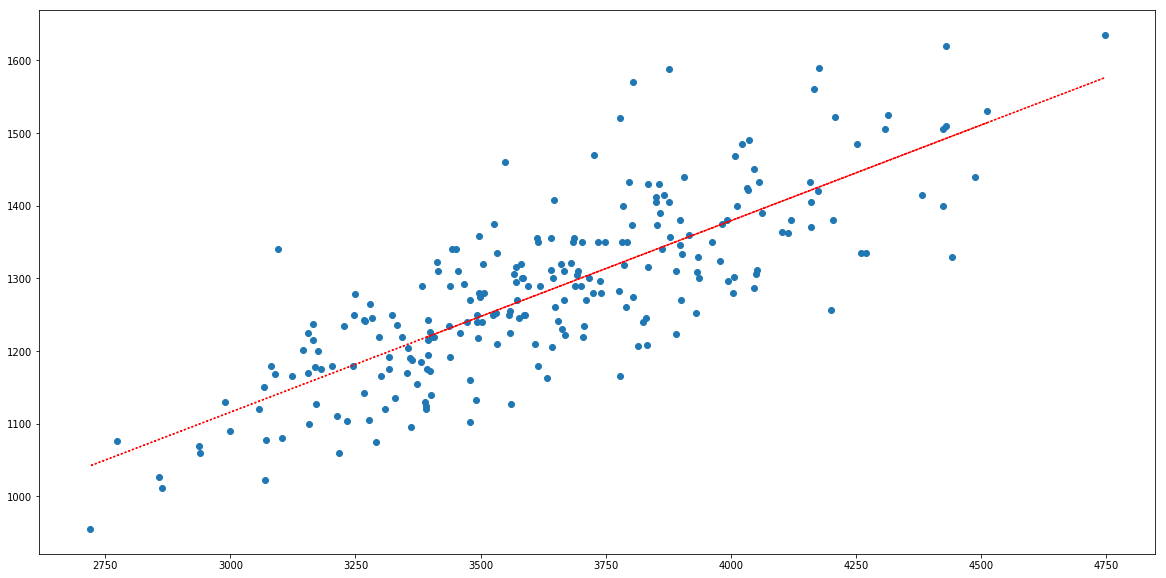

(0.6393117199570003, None)

In [61]:
regy=[m*i+b for i in x ]
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.scatter(x,y)
plt.plot(x,regy,'r:')
def coeff(dy,ry):
    ym=sum((dy-mean(dy))**2)
    yr=sum((dy-ry)**2)
    return 1-(yr/ym)
coeff(y,regy),plt.show()

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# Cannot use Rank 1 matrix in scikit learn
x = x.values.reshape((237,1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(x, y)
# Y Prediction
Y_pred = reg.predict(x)
 
# Calculating R2 Score
r2_score = reg.score(x, y)
 
print(r2_score)

0.639311719957
